# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params= {"q": city, "appid": weather_api_key}
    city_url = requests.get(url, params=params)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port douglas
Processing Record 5 of Set 1 | westport
Processing Record 6 of Set 1 | santana
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | inarajan village
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | fortaleza
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | pangody
Processing Record 21 of Set 1 | carnarvon
Processing Re

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,270.54,91,9,1.72,CL,1690149666
1,iskateley,67.6803,53.1512,288.11,94,100,3.04,RU,1690149724
2,port-aux-francais,-49.3500,70.2167,279.06,86,80,15.58,TF,1690149294
3,port douglas,-16.4833,145.4667,292.40,74,36,2.99,AU,1690149768
4,westport,41.1415,-73.3579,303.91,53,18,1.79,US,1690149533


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")


#convert the temperature from Kelvin to Celcius
city_data_df['Max Temp'] -=273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-2.61,91,9,1.72,CL,1690149666
1,iskateley,67.6803,53.1512,14.96,94,100,3.04,RU,1690149724
2,port-aux-francais,-49.3500,70.2167,5.91,86,80,15.58,TF,1690149294
3,port douglas,-16.4833,145.4667,19.25,74,36,2.99,AU,1690149768
4,westport,41.1415,-73.3579,30.76,53,18,1.79,US,1690149533


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

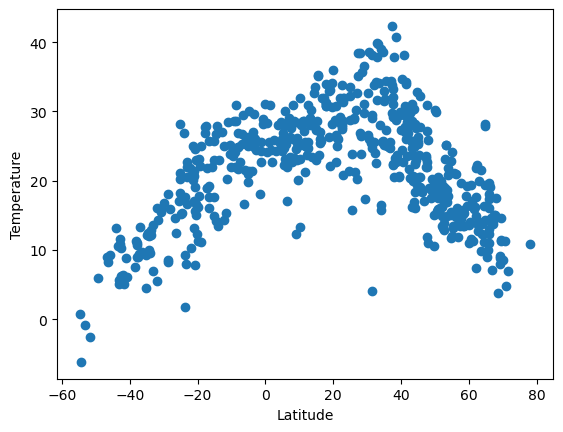

In [39]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

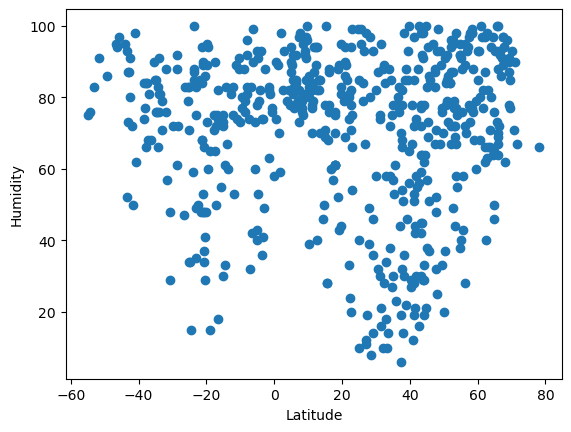

In [40]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

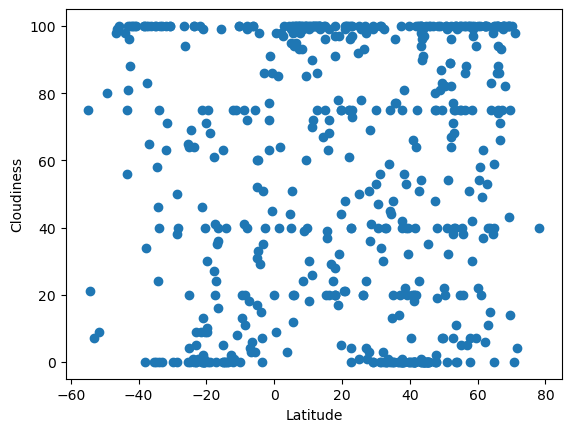

In [41]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

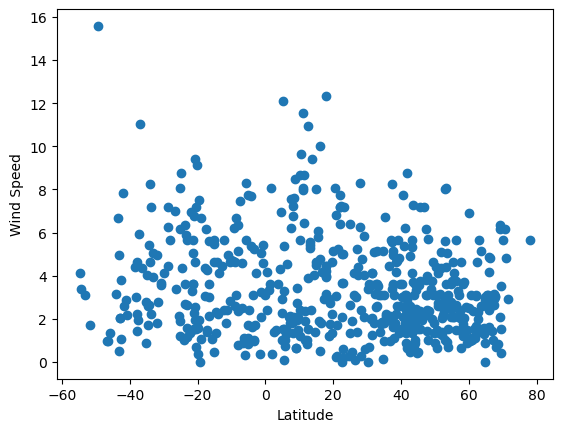

In [42]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def relationship (x_values,y_values,title, xlabel, ylabel,ann_coords,r_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Build the scatter plots for latitude vs. wind speed

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color="red")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.annotate("r-value: " +str(rvalue), r_coords, fontsize=8)
    plt.annotate(line_eq,ann_coords,fontsize=12,color="red")
    plt.show()



In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,14.96,94,100,3.04,RU,1690149724
4,westport,41.1415,-73.3579,30.76,53,18,1.79,US,1690149533
6,vadso,70.0744,29.7487,8.49,93,100,5.66,NO,1690149769
7,isafjordur,66.0755,-23.1240,11.04,88,100,1.60,IS,1690149725
8,inarajan village,13.2736,144.7484,29.08,85,100,5.42,GU,1690149769


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-2.61,91,9,1.72,CL,1690149666
2,port-aux-francais,-49.3500,70.2167,5.91,86,80,15.58,TF,1690149294
3,port douglas,-16.4833,145.4667,19.25,74,36,2.99,AU,1690149768
5,santana,-0.0583,-51.1817,31.10,58,20,3.09,BR,1690149768
10,adamstown,-25.0660,-130.1015,20.23,71,4,8.08,PN,1690149170


###  Temperature vs. Latitude Linear Regression Plot

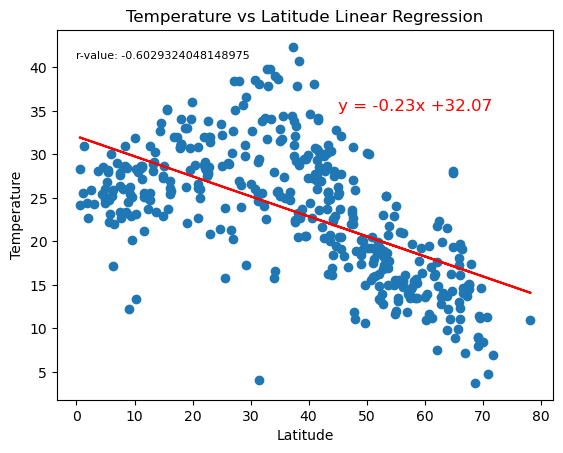

In [66]:
# Linear regression on Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Max Temp']," Northern Hemisphere Temperature vs Latitude Linear Regression", "Latitude", "Temperature",(45,35),(0,41))
    

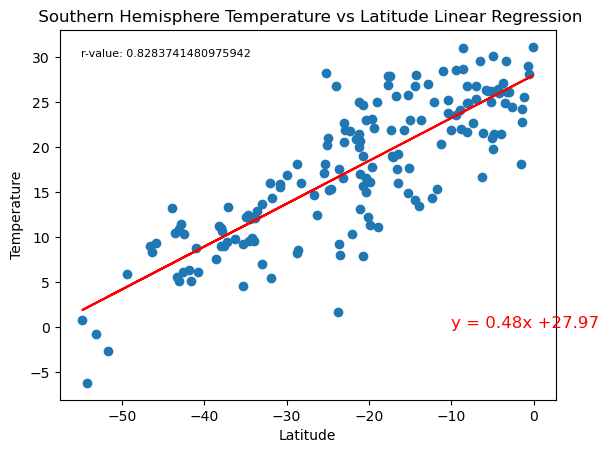

In [69]:
# Linear regression on Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Max Temp']," Southern Hemisphere Temperature vs Latitude Linear Regression", "Latitude", "Temperature",(-10,0),(-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

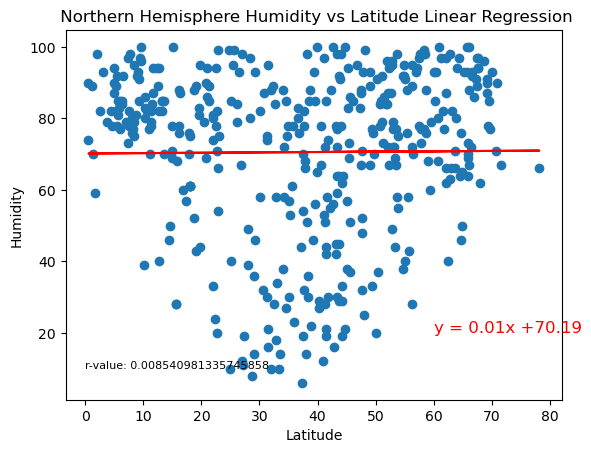

In [71]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Humidity']," Northern Hemisphere Humidity vs Latitude Linear Regression", "Latitude", "Humidity",(60,20),(0,10))

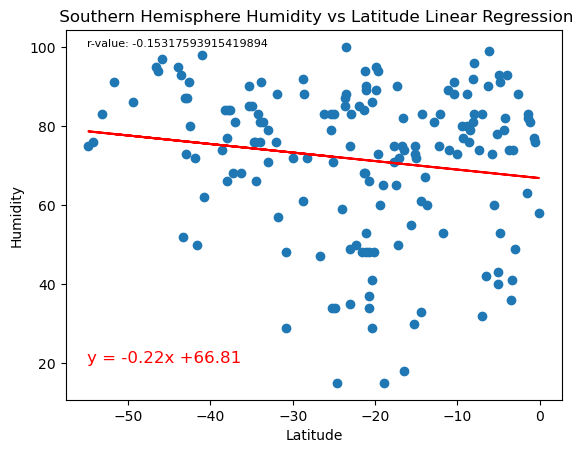

In [73]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Humidity']," Southern Hemisphere Humidity vs Latitude Linear Regression", "Latitude", "Humidity",(-55,20),(-55,100))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

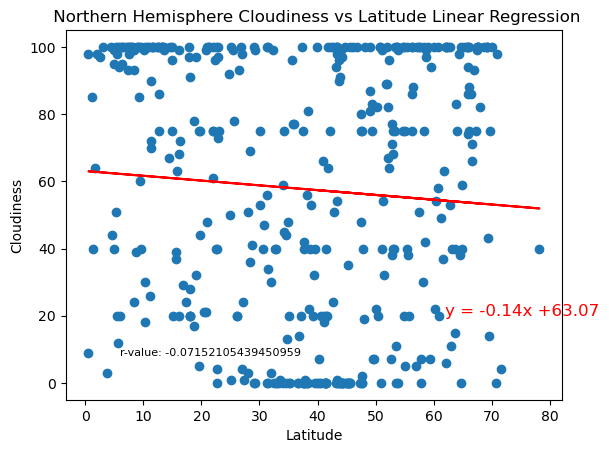

In [77]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness']," Northern Hemisphere Cloudiness vs Latitude Linear Regression", "Latitude", "Cloudiness",(62,20),(6,8))

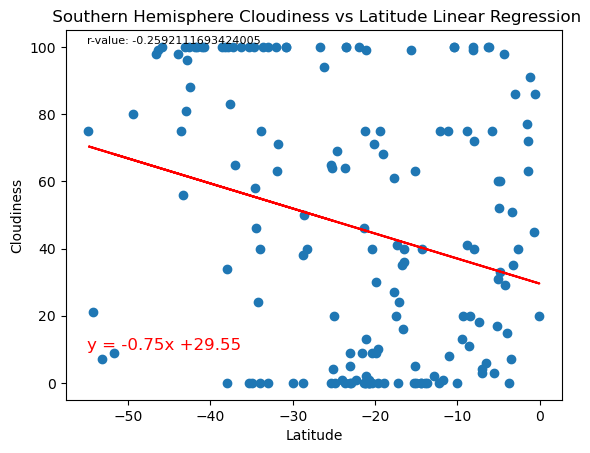

In [79]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness']," Southern Hemisphere Cloudiness vs Latitude Linear Regression", "Latitude", "Cloudiness",(-55,10),(-55,101))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

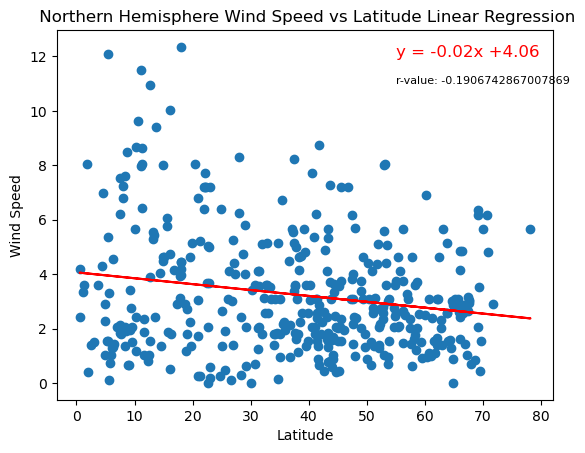

In [82]:
# Northern Hemisphere
relationship(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed']," Northern Hemisphere Wind Speed vs Latitude Linear Regression", "Latitude", "Wind Speed",(55,12),(55,11))

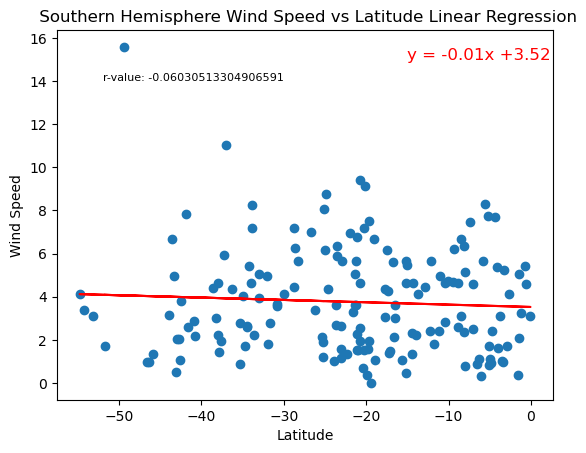

In [86]:
# Southern Hemisphere
relationship(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed']," Southern Hemisphere Wind Speed vs Latitude Linear Regression", "Latitude", "Wind Speed",(-15,15),(-52,14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE